# Logistic Regression Revisited

I have been meaning to revisit logistic regression for a while now. I have learned it in class, and while I understand what is going on, I wanted to solidify my understanding. I came across logistic regression few times in college during Econometrics courses, but it was usually taught briefly at the very end, so I never felt like I had a solid understanding of it. Also, coming from a math background, I like to have a full understanding before implementing it. I am certain that there are many resources out there, but consider this as a future note to myself. Sadly I did not have patience to sit through Andrew Ng's video (which are wonderful btw), so I read [**Introductionto Statistical Learning**](http://www-bcf.usc.edu/~gareth/ISL/) instead. Consequently, this follows closely to that book. Let's get started!

**What is Logistic Regression?** Logistic regression is a classification algorithm that returns the probability that the target belongs to a certain category. While logistic regression can be used for multi-class (more than 2) we will first consider its use for binary class (either 0 or 1).

**Why not use Linear Regression?** While linear regression is intuitive, it has a drawback. If we fit a linear model on our data, we will get probabilty $p(X) = \beta_0 + \beta_1X$. This however means that we will get negative predicted probability and probability that is greater than one, which does not make sense as aprobability since probability should fall between 0 and 1.

The solution to this problem is to use a function that outputs only within 0 and 1 range for any possible value of inputs. The *logistic function* is such a function that satisfy this condition. It is not the only function that satisfies this, but it is by far the most popular one. It is of the form:  
$$p(X) = \frac{e^{\beta_0 + \beta_1X}}{1 + e^{\beta_0 + \beta_1X}}$$

Let's take a look at visualization to see the difference between the two.

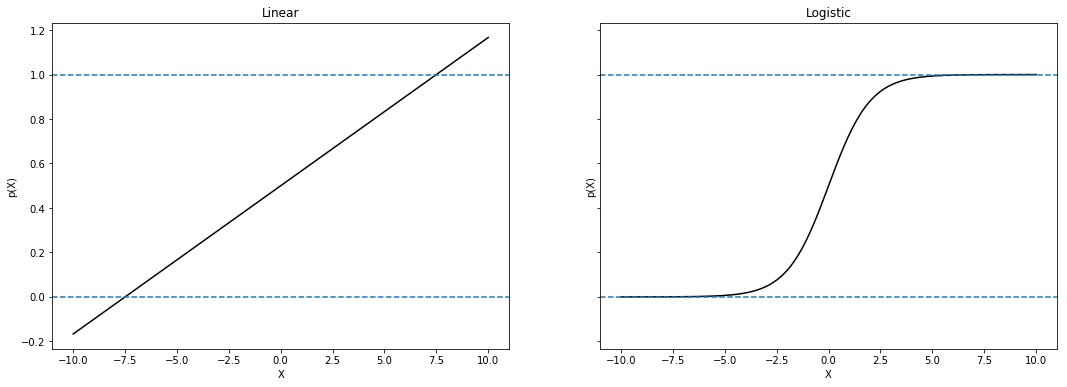

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = np.linspace(-10,10,200)
y1 = X/15 + 0.5
y2 = np.exp(X) / (1 + np.exp(X))

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(18,6))
ax1.plot(x, y1,'k')
ax1.set_title('Linear')
ax1.axhline(0,linestyle='--')
ax1.axhline(1,linestyle='--')
ax1.set_xlabel('X')
ax1.set_ylabel('p(X)')
ax2.plot(x, y2,'k')
ax2.set_title('Logistic')
ax2.axhline(0,linestyle='--')
ax2.axhline(1,linestyle='--')
ax2.set_xlabel('X')
ax2.set_ylabel('p(X)');

As expected, our linear function goes outside the range, while logistic stays within.

In `sklearn`, the decision boundary for logistic regression is 0.5 leading to prediction of 1 for probability greater than or equal to 0.5 and 0 otherwise.

$$\hat{y}=
\begin{cases}
1 & if \quad\hat{p} \geq 0.5, \\
0 & if \quad\hat{p} < 0.5
\end{cases}$$

We can rearange $(1)$: 

$$p(X)(1 + e^{\beta_0 + \beta_1X}) = e^{\beta_0 + \beta_1X}\notag$$  

$$p(X) + p(X)e^{\beta_0 + \beta_1X} = e^{\beta_0 + \beta_1X}\notag$$ 

$$p(X) = e^{\beta_0 + \beta_1X} - p(X)e^{\beta_0 + \beta_1X}\notag$$  

$$p(X) = e^{\beta_0 + \beta_1X}(1 - p(X))\notag$$  

$$\frac{p(X)}{(1 - p(X))} = e^{\beta_0 + \beta_1X}$$  

The left-hand side, $\large\frac{p(X)}{(1 - p(X))}$ is called the odds and can take any values from $0$ to $\infty$. How do we interpret this? The odds close to $0$ imply very high probability while odds $\infty$ imply very high probability respectively. With the odds of $\frac{1}{9}$, 1 in 10 people on average will take value 1, since $p(X) = 0.1$ implies an odds of $\frac{0.1}{1-0.1} = \frac{1}{9}$. Likewise, the odds of $\frac{1}{4}$ indicates that on average, two out of every ten people will take value 1, since $p(X) = 0.2$ implies an odds of $\frac{0.2}{1-0.2} = \frac{1}{4}$.

To get a more familiar form on the right side, we take the log on both sides of $(2)$.  
$$log(\frac{p(X)}{(1 - p(X))}) = \beta_0 + \beta_1X$$ 

Now the left-hand side is called the *log-odds* or *logit*. In logistic regression, we have a log-odds that is linear with respect to X.

So far we have only considered one X for simplicity, but like multiple linear regression, we can extend to multiple logistic regression.
Starting with
$$p(X) = \frac{e^{\beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p}}{1 + e^{\beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p}}$$
we get
$$log(\frac{p(X)}{(1 - p(X))}) = \beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p$$ 
The derivation is same as above.

**How to interpret $\beta$s?** Recall that in linear regression model, $\beta_1$ represents the average change in target Y associated with a unit increase in X. In logistic regression, $\beta_1$ represents the average change in log-odds associated with a unit increase in X. This can be seen from the $(3)$.

**How do we get $\beta$s?** In linear regression, we used least squares to find $\hat\beta_0$ and $\hat\beta_1$. In logistic regression we use maximum likelihood. The formula for likelihood function is:

$$l(\beta_0, \beta_1) = \prod_{i: y_i = 1}p(x_i) \prod_{i': y_{i'} = 0}(1 - p(x_{i'}))$$

We want $\hat\beta_0$ and $\hat\beta_1$ that maximize this likelihood function, and since there is a lot going on here, let's unpack one by one. The left hand side is likelihood function. $\prod$ is like a $\sum$ function but it is taking the product instead of the sum. Therefore, $\prod_{i: y_i = 1}p(x_i)$ is the product of probabilities of y equaling one for those observations that are actually equal to one, and $\prod_{i': y_i' = 0}(1 - p(x_i'))$ is the product of probabilities of y equaling zero for those observations that are actually zero.

The likelihood function can be expressed differently.
$$
l(\beta) = \prod_{i=1}^np(y=1|x_i;\beta)^{y_i}p(y=0|x_i;w)^{1-y_i} \quad\text{(likelihood)} $$

This is equivalent to the previous likelihood equation because of the exponents which takes value of 0, 1 accordingly.

Also, $p(y=1|x_i;\beta) + p(y=0|x_i;w) = 1$ since the probability has to sum up to 1 and we are considering binary case. If we express $p(y=1|x_i;\beta) = \hat{p_i}$, then $p(y=0|x_i;w) = 1 - \hat{p_i}$.Replacing the values accordingly we get:
$$= \prod_{i=1}^n \hat{p_i}^{y_i} (1-\hat{p_i})^{1-y_i}$$
Or equivalently, maximize the log likelihood:
$$
log{l(\beta)} = log\prod_{i=1}^n \hat{p_i}^{y_i} (1-\hat{p_i})^{1-y_i}$$
The log-likelihood turns products into sums
$$= \sum_{i=1}^n y_i log{\hat{p_i}^{y_i}} + (1-y_i) log{(1-\hat{p_i})^{1-y_i}} \quad\text{(log-likelihood)} $$

The interesting thing is that maximizing the above equation is equivalent to minimizing the negative of the equation:
$$-\sum_{i=1}^n y_i log{\hat{p_i}^{y_i}} + (1-y_i) log{(1-\hat{p_i})^{1-y_i}}$$
which is equivalent to minimizing the log-loss, the cost function of Logistic Regression
$$J(\theta) = -\frac{1}{n}\sum_{i=1}^n y_i log{\hat{p_i}^{y_i}} + (1-y_i) log{(1-\hat{p_i})^{1-y_i}} \quad\text{(log-loss)} $$

# Moving Beyond Binary Case

We will of course come across cases where the number of classes are greater than two. We will consider the extension of Logistic Regression which is intrinsically developed for a binary case.

## One-Versus-All

The most intuitive way do this would be to divide the problem into multiple binary case classifications scenarios and use the logistic regression classifier we are familiar with. For example, let's say we have three classes: A, B, and C. Then, we can first divide the dataset into A and not-A (i.e. B and C). Then we are left with a binary classification problem again! We do the same for B & not-B and C & not-C and we are done!

While one versus the rest method might be intuitive, one can imagine that the number of classifiers one has to build increases as the number of classes increases. There is another method available which allows us to build only one classifier which is introduced next.

## Softmax Regression

The Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers. This is called _Softmax Regression_, or _Multinomial Logistic Regression_.

The idea is quite simple: when given an instance x, the Softmax Regression model first computes a score $s_k(x)$ for each class k, then estimates the probability of each class by applying the softmax function (also called the normalized exponential) to the scores. The equation to compute $s_k(x)$ should look familiar, as it is just like the equation for Linear Regression prediction.

$$s_k(x)=\theta_k^T\cdot{x}$$

Note that each class has its own dedicated parameter vector $\theta_k$. All these vectors are typically stored as rows in a parameter matrix $\Theta$.

Once you have computed the score of every class for the instance x, you can estimate the probability $p_k$ that the instance belongs to class k by running the scores through the softmax function. It computes the exponential of every score, then normalizes them by dividing by the sum of all the exponentials.

$$\hat{p}_k = \sigma(s(x))_k = \frac{e^{s_k(x)}}{\sum_{k=1}^K e^{s_k(x)}}$$

where
* K is the number of classes
* s(x) is a vector containing the scores of each class for the instance x.
* $\sigma(s(x))_k$ is the estimated probability that the instance x belongs to class k given the scores of each class for that instance.

Just like the Logistic Regression classifier, the Softmax Regression classifier predicts the class with the highest estimated probability which translates to the class with the highest score.

$$\hat{y}=\operatorname*{argmax}_k \sigma(s(x))_k = \operatorname*{argmax}_k s_k(x) = \operatorname*{argmax}_k (\theta_k^T\cdot{x})$$

The cost function for softmax regression is cross-entropy given by:

$$J(\Theta) = -\frac{1}{n} \sum_{i=1}^n \sum_{k=1}^K y_{k_i} log(\hat{p_{k_i}})$$

* $y_k^i$ is equal to 1 if the target class for the $i^{th}$ instance is $k$; otherwise, it is equal to 0.

Notice that when there are only two classes (K = 2), this cost function is equivalent to
the log-loss.

In `sklearn`, the default for multi-class `LogisticRegression` is one-versus-all. If you want to use softmax, you have to set `multi_class="multinomial"`.